In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load your cleaned dataset
df = pd.read_csv("cleaned_data.csv")  # Replace with your actual file

In [19]:
# Preview
print(df.head())
print(df.isnull().sum())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [20]:
# Feature selection
# Example: Predict Survived using Age, Sex, Fare
X = df[["Age", "Sex", "Fare"]]  # multiple features (X)
y = df["Survived"]  # target variable (y)

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Train Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 0.17313117616597973
Coefficients: [-0.00086276  0.52213197  0.00150004]
Age: -0.0008627578540418646
Sex: 0.5221319678256248
Fare: 0.001500041439343347


In [12]:
# Predict
y_pred = model.predict(X_test)

In [24]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.3254
MSE: 0.1615
R² Score: 0.3341


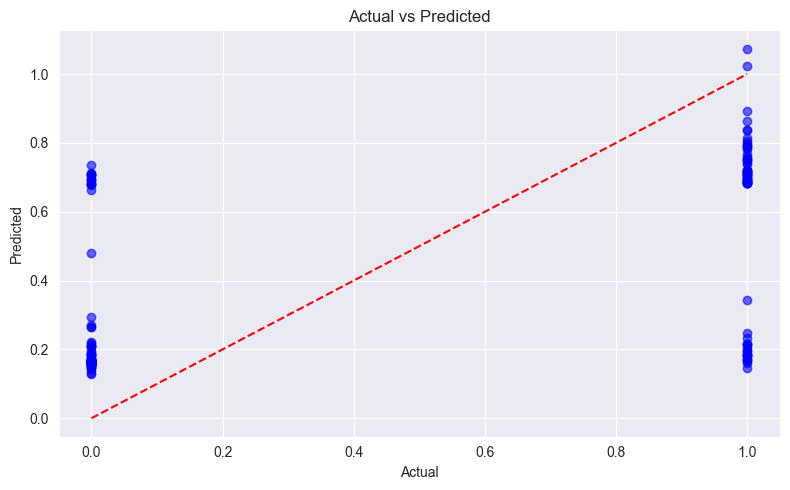

In [26]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()